In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams.update({'font.size': 18})

from pandas import *

In [5]:
def update_w_and_b(spendings, sales, w, b, alpha):
    dl_dw = 0.0
    dl_db = 0.0
    N = len(spendings)
    
    for i in range(N):
        dl_dw += -2*spendings[i] * (sales[i] - (w*spendings[i] + b))
        dl_db += -2*(sales[i] - (w*spendings[i] + b))
        
    # update w and b
    w = w - (1/float(N)) * dl_dw * alpha
    b = b - (1/float(N)) * dl_db * alpha
    return w, b

def train(spendings, sales, w, b, alpha, epochs):
    for e in range(epochs):
        w, b = update_w_and_b(spendings, sales, w, b, alpha)
        
        # log the progress
        if e % 400 == 0:
            print("epoch:", e, "loss: ", avg_loss(spendings, sales, w, b))
    return w, b

def loss(spendings, sales, w, b):
    N = len(spendings)
    total_error = 0.0
    for i in range(N):
        total_error += (sales[i] - (w*spendings[i] + b))**2
    return total_error / N

def avg_loss(spendings, sales, w, b):
    N = len(spendings)
    total_error = 0.0
    for i in range(N):
        total_error += (sales[i] - (w * spendings[i] + b))**2    
    return total_error / float(N)

def predict(x, w, b):
    return w*x + b



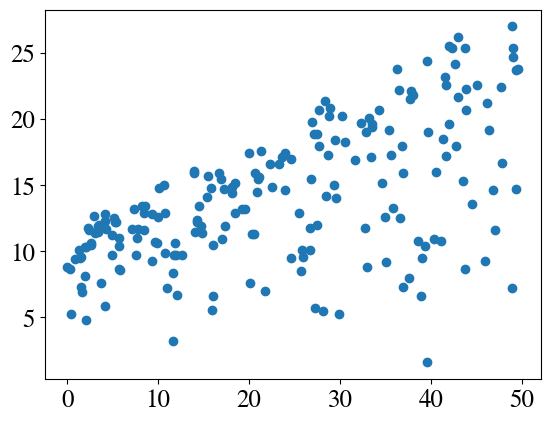

In [21]:
data = read_csv("Advertising.csv")

x = data['radio'].tolist()
y = data['sales'].tolist()

plt.scatter(x,y)


In [27]:
w, b = train(x, y, 0.0, 0.0, 0.001, 15000)
x_new = 5.0
y_new = predict(x_new, w, b)
print(y_new)

epoch: 0 loss:  92.32078294903626
epoch: 400 loss:  33.79131790081576
epoch: 800 loss:  27.9918542960729
epoch: 1200 loss:  24.33481690722147
epoch: 1600 loss:  22.028754937538633
epoch: 2000 loss:  20.57459375662496
epoch: 2400 loss:  19.657625883308423
epoch: 2800 loss:  19.07940244306619
epoch: 3200 loss:  18.71478514667572
epoch: 3600 loss:  18.48486404079425
epoch: 4000 loss:  18.33987992881413
epoch: 4400 loss:  18.248455556762373
epoch: 4800 loss:  18.19080499291156
epoch: 5200 loss:  18.154451584758743
epoch: 5600 loss:  18.131527779750563
epoch: 6000 loss:  18.117072440822145
epoch: 6400 loss:  18.1079571642151
epoch: 6800 loss:  18.102209234814435
epoch: 7200 loss:  18.098584693967343
epoch: 7600 loss:  18.096299123732113
epoch: 8000 loss:  18.094857884270205
epoch: 8400 loss:  18.093949064600373
epoch: 8800 loss:  18.09337597927063
epoch: 9200 loss:  18.093014601974247
epoch: 9600 loss:  18.092786723954067
epoch: 10000 loss:  18.09264302817517
epoch: 10400 loss:  18.09255241

In [ ]:
plt.scatter(x,y)
plt.scatter([x_new],[y_new])